In [9]:
import pandas as pd
import json
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Sort Data by Timestamp
tweet_raw_file_dir = "C:\\Users\\jesse\\Desktop\\DDHW\\Testing\\20231021_merged_data.csv"
df = pd.read_csv(tweet_raw_file_dir)

# Convert the "Timestamp" column to datetime format, allowing inference of formats
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Drop rows with invalid dates (NaT)
df = df.dropna(subset=['Timestamp'])

# Sort the DataFrame by Timestamp
df = df.sort_values(by='Timestamp')
df.head(len(df))

,Timestamp,Username,Tweet Content,Retweets,Likes,Replies,scores
216,2023-10-10,krakenfx,@Bitcoin Bitcoin rocks 🧡 🙌,2,14,8,0.938087
64,2023-10-10,Bitcoin,#Bitcoin: where innovation meets decentralizat...,480,1772,198,0.714894
65,2023-10-10,Bitcoin,#Bitcoin is a beacon of hope in the financial ...,387,1292,216,0.619403
87,2023-10-10,DocumentingBTC,"Paul T. Jones is worth $8,100,000,000 and pion...",911,3930,151,0.800349
88,2023-10-10,DocumentingBTC,"Fidelity @DigitalAssets Research Study\n\n""Bit...",34,201,11,0.010538
...,...,...,...,...,...,...,...
60,2023-10-17,BTC_Archive,RT @BTC_Archive: JUST IN: $71m in leveraged po...,522,0,0,-0.602837
228,2023-10-19,krakenfx,@WatcherGuru There's a way out of the system. ...,4,114,9,0.216164
227,2023-10-19,krakenfx,@AltcoinDailyio Bitcoin rocks! 🧡 😉,0,11,6,0.956377
229,2023-10-19,krakenfx,"@pete_rizzo_ Bitcoin adoption, worldwide! 💪 🧡",2,7,1,0.815703


In [10]:
# Step 2: Calculate Sentiment Index
df['Sentiment_Index'] = df['Likes'] * df['scores']

# Step 3: Group Data by Date and Sum Sentiment_Index
# Extract the date from the 'Timestamp' column
df['Date'] = df['Timestamp'].dt.date

# Group the data by date and sum the 'Sentiment_Index' for each date
processed_data = df.groupby('Date')['Sentiment_Index'].sum().reset_index()

# Step 4: Create and Save Processed Data with a Specified Filename
target_directory = "C:\\Users\\jesse\\Desktop\\DDHW\\Testing\\"
output_file_path = target_directory + 'processed_sentiment_index_by_date.csv'

# Save the processed data to a new CSV file without index column
processed_data.to_csv(output_file_path, index=False)

df = pd.read_csv(output_file_path)
df.head(len(df))

,Date,Sentiment_Index
0,2023-10-10,11545.618104
1,2023-10-11,5105.910992
2,2023-10-12,4321.347785
3,2023-10-13,12474.556048
4,2023-10-14,3330.625824
5,2023-10-15,8110.174505
6,2023-10-16,11217.516881
7,2023-10-17,4464.933664
8,2023-10-19,40.872794
9,2023-10-20,14.881797


In [11]:
# Convert JSON data to CSV

# Read JSON data from a file
bitcoin_price_file_dir = "C:\\Users\\jesse\\Desktop\\DDHW\\Testing\\price.json"
with open(bitcoin_price_file_dir, 'r') as file:
    json_data = file.read()

# Parse JSON data
data = json.loads(json_data)

# Extract 'Date' and 'Price' data
price_data = data.get('market-price', [])
date_price_data = [{'Date': datetime.fromtimestamp(item['x'] / 1000).strftime('%Y-%m-%d'), 'Price': item['y']} for item in price_data]

# Create a DataFrame
df = pd.DataFrame(date_price_data)

# Define the directory where you want to save the CSV file
output_directory = "C:\\Users\\jesse\\Desktop\\DDHW\\Testing\\"

# Construct the full file path for the CSV file, using the JSON file's name
json_filename = bitcoin_price_file_dir.split("\\")[-1]  # Get the JSON file name
csv_filename = output_directory + json_filename.replace(".json", ".csv")  # Replace the extension

# Save DataFrame as a CSV file
df.to_csv(csv_filename, index=False)

In [12]:
bitcoin_price_file_dir = "C:\\Users\\jesse\\Desktop\\DDHW\\Testing\\price.csv"
df = pd.read_csv(bitcoin_price_file_dir)
df.head(len(df))

,Date,Price
0,2023-09-22,26569.60
1,2023-09-23,26581.86
2,2023-09-24,26580.72
3,2023-09-25,26252.75
4,2023-09-26,26293.29
5,2023-09-27,26212.82
6,2023-09-28,26357.65
7,2023-09-29,27021.15
8,2023-09-30,26916.91
9,2023-10-01,26970.43


In [13]:
# Step 5: Merge Sentiment_Index with Price_Next_Day

# Read data from both files
sentiment_df = pd.read_csv(output_file_path)
bitcoin_df = pd.read_csv(bitcoin_price_file_dir)

# Convert date columns to datetime format for consistency
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])

# Shift the Bitcoin price values by one day to create the "price_next_day" column
bitcoin_df['Price'] = bitcoin_df['Price'].shift(-1)  # Shift prices by one day

# Merge data based on the 'Date' column
merged_df = sentiment_df.merge(bitcoin_df, on='Date', how='left')

# Overwrite the existing file with the merged data
merged_df.to_csv(output_file_path, index=False)

df = df = pd.read_csv(output_file_path)
df.head(len(df))

,Date,Sentiment_Index,Price
0,2023-10-10,11545.618104,27395.65
1,2023-10-11,5105.910992,26867.79
2,2023-10-12,4321.347785,26758.66
3,2023-10-13,12474.556048,26866.51
4,2023-10-14,3330.625824,26855.89
5,2023-10-15,8110.174505,27167.87
6,2023-10-16,11217.516881,28517.32
7,2023-10-17,4464.933664,28413.17
8,2023-10-19,40.872794,28723.49
9,2023-10-20,14.881797,29682.60


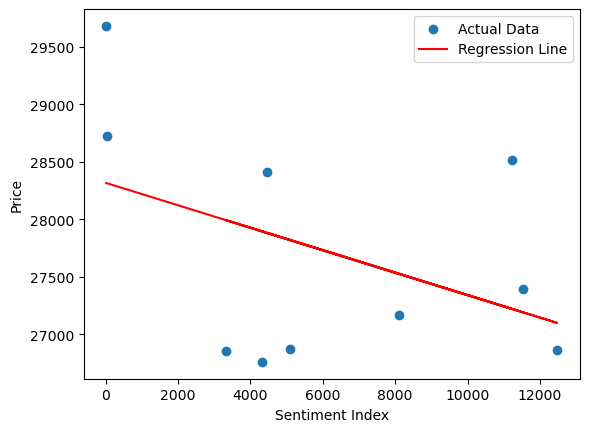

In [14]:
# Read your dataset into a pandas DataFrame
data = pd.read_csv(output_file_path)

# Define the independent (X) and dependent (y) variables
X = data['Sentiment_Index'].values.reshape(-1, 1)
y = data['Price'].values

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Visualize the data and regression line
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Sentiment Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [15]:
beta_0 = model.intercept_
beta_1 = model.coef_[0]
epsilon = y - y_pred

print(f'Intercept (beta_0): {beta_0}')
print(f'Slope (beta_1): {beta_1}')
print(f'Residuals (epsilon): {epsilon}')

Intercept (beta_0): 28317.240034877774
Slope (beta_1): -0.09770407936978556
Residuals (epsilon): [  206.46395273  -950.58170206 -1136.36672792  -231.91502061
 -1135.93430502  -356.97290131  1296.07712476   532.17219819
   410.24340388  1366.81397738]
